In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import random
import statistics as st
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats

In [2]:
novice_token =  pd.read_csv(r'C:\xxx\novice_syn_data.csv')

In [3]:
expert_token =  pd.read_csv(r'C:\xxxx\expert_syn_data.csv')

In [4]:
def logML(a):  
    pro = -a*np.log(rank) - np.log(np.sum(1/rank**a))
    

    # Multiply the vector by frequencies
    Lvector =pro * frequency

    # LL is the sum
    L = Lvector.sum()

    # We want to maximize LogLikelihood or minimize (-1)*LogLikelihood
    return(-L)

In [5]:
def zipflaw(dt):
    zipf_dt = pd.DataFrame(columns=['Frequency'])
    nov_freq = dt.drop(['Author'])
    temp2=nov_freq[nov_freq!=0].sort_values(ascending=False).reset_index()
    frequency = temp2[temp2.columns[1]]
    probability = frequency/np.sum(frequency)
    zipf_dt['Frequency'] = frequency
    zipf_dt['Probability'] = probability
    rank=np.array(range(1,len(temp2)+1))
    zipf_dt['rank'] = rank
    s_best = sp.optimize.minimize(logML, [1])
    alpha=s_best.x
    zipf_dt['alpha'] = alpha[0]
    zipf_dt['zipflaw']=(rank**(-alpha))/np.sum(1/rank**alpha)
    zipf_dt['log_pro'] = np.log(probability.astype(np.float64))
    zipf_dt['log_rank'] = np.log(rank)
    zipf_dt['log_zipflaw'] = -alpha*np.log(rank) - np.log(np.sum(1/rank**alpha))
    return zipf_dt

In [6]:
expert_smp1 = pd.DataFrame(columns=['best_a','sample_size'])

In [7]:
for i in range (1,600):
    dev_name= "exp_dev"+str(i)
    expert = expert_token[expert_token['Author']==dev_name]
    expert_dt = exp_smp.groupby('Author').sum().reset_index()
    #dev=expert_dt.iloc[i]
    dev = expert_dt.drop(['Author'],axis=1)
    temp = dev.transpose()
    exp_freq = temp[0]
    temp2=exp_freq[exp_freq!=0].sort_values(ascending=False).reset_index()
    frequency = temp2[temp2.columns[1]]
    rank=np.array(range(1,len(temp2)+1))
    s_best = sp.optimize.minimize(logML, [1])
    alpha=s_best.x
    expert_smp1=expert_smp1.append({'best_a':alpha[0],'sample_size':np.sum(exp_freq)},ignore_index=True)

In [8]:
novice_smp1 = pd.DataFrame(columns=['best_a','sample_size'])

In [9]:
for i in range (1,600):
    dev_name= "N_dev"+str(i)
    novice = novice_token[novice_token['Author']==dev_name]
    novice_dt = nov_smp.groupby('Author').sum().reset_index()
    #dev=expert_dt.iloc[i]
    dev = novice_dt.drop(['Author'],axis=1)
    temp = dev.transpose()
    exp_freq = temp[0]
    temp2=exp_freq[exp_freq!=0].sort_values(ascending=False).reset_index()
    frequency = temp2[temp2.columns[1]]
    rank=np.array(range(1,len(temp2)+1))
    s_best = sp.optimize.minimize(logML, [1])
    alpha=s_best.x
    novice_smp1=novice_smp1.append({'best_a':alpha[0],'sample_size':np.sum(exp_freq)},ignore_index=True)

In [10]:
parm_exp=expert_smp1['best_a'].astype(float)
sort_exp= sorted(np.array(parm_exp))
exp_par_a = norm.pdf(sort_exp, np.mean(sort_exp), np.std(sort_exp))

In [11]:
parm_nov=novice_smp1['best_a'].astype(float)
sort_nov= sorted(np.array(parm_nov))
nov_par_a = norm.pdf(sort_nov, np.mean(sort_nov), np.std(sort_nov))

In [12]:
m1=[np.mean(parm_exp),np.mean(parm_nov)]

In [13]:
st1=[np.std(parm_exp),np.std(parm_nov)]

C:\Users\morad\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
C:\Users\morad\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


Text(0.95, 0.1, 'μ=0.966')

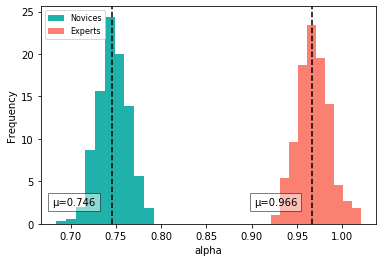

In [14]:
fig, ax = plt.subplots(figsize=(6,4))
#plt.ylabel("Probability",fontsize=10)
#plt.legend(('Probability Distribution','Original'),loc='upper right',
           #ncol=3,
           #fontsize=10)
#plt.plot(sort_nov,nov_par_a,color='red')
plt.hist(sort_nov,normed=True,color='lightseagreen')
#plt.plot(sort_exp,exp_par_a,color='blue')
plt.hist(sort_exp,normed=True, color='salmon')
plt.xlabel("alpha",fontsize=10)

#plt.ylim(0,30)
#plt.xlim(0.67,1.05)

#plt.yticks(np.arange(-3, 3, 0.25))
#plt.xticks(np.arange(0.67, 1.05, 0.03))

plt.legend(('Novices','Experts'),loc='upper left',
           ncol=1,
           fontsize=8)
plt.xlabel("alpha",fontsize=10)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
#plt.savefig('alpha_dist_syn.png',dpi=700)
plt.ylabel("Frequency",fontsize=10)
plt.axvline(x=0.746,linestyle='--',color='black')
plt.text(0.68,0.1, 'μ={:.3f}'.format(0.746), va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
        transform=ax.get_xaxis_transform())
plt.axvline(x=0.966,linestyle='--',color='black')
plt.text(0.95,0.1, 'μ={:.3f}'.format(0.966), va='center', ha="right", bbox=dict(facecolor="w",alpha=0.5),
        transform=ax.get_xaxis_transform())
#plt.savefig('alpha_dist_syn.png',dpi=700)
#plt.title('The distribution of alpha parameter in "Expert"and "Novice" groups', fontsize=12)
#plt.title('Expert Developer', fontsize=10)